
                                                                           
   # <center>Diabet Prediction with Neural Network</center>               

 # <center>By Maryam Madadgar</center>

# Introduction

# Reseasrch Objective
In this project, all patients are females at least 21 years old of Pima Indian heritage.The objective is to predict based on diagnostic measurements whether a patient has diabetes.In this project, the impact of 8 factors(see in data source) is reviewed on diabet outcome(0 or one). 
# Research question
1.Predicting outcome(Risk) of diabet by using Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age factors.
2.Evaluating of accuracy of Neural Network algorithm for this prediction.

# Data source
The data set was sourced from https://www.kaggle.com/datasets/jillanisofttech/diabetes-disease-updated-dataset.
Several constraints were placed on the selection of these instances from a larger database. 
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
Pregnancies:Number of times pregnant , Glucose:Plasma glucose concentration a 2 hours in an oral glucose tolerance test,
Blood pressure:Diastolic blood pressure (mm Hg),SkinThickness:Triceps skin fold thickness (mm),Insulin:2-Hour serum insulin (mu U/ml),
BMI: Body mass index (weight in kg/(height in m)^2), DiabetesPedigreeFunction: Diabetes pedigree function,Age: Age (years),
Outcome: Class variable (0 or 1).

Sources:
(a) Original owners: National Institute of Diabetes and Digestive and Kidney Diseases
(b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
Research Center, RMI Group Leader
Applied Physics Laboratory
The Johns Hopkins University
Johns Hopkins Road
Laurel, MD 20707
(c) Date received: 9 May 1990

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix

# Analyze data by descriptive statistics and graphical visualization.

In [30]:
# Filter warnings 
import warnings
warnings.filterwarnings('ignore')

DiabetData = pd.read_csv('diabetes.csv')
print(DiabetData.shape)
print(DiabetData.head())
print(DiabetData.describe())
types = DiabetData.dtypes
print(types)

(768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.

In [31]:
# Print the summary of the data

print(DiabetData.describe())
print(DiabetData.describe().T)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [32]:
# Print the datatypes which are keys.
types = DiabetData.dtypes
print(types)
print("Keys of DiabetData dataset:\n", DiabetData.keys())

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
Keys of DiabetData dataset:
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [33]:
# print the target variable

print("Outcome:", DiabetData['Outcome'])

Outcome: 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


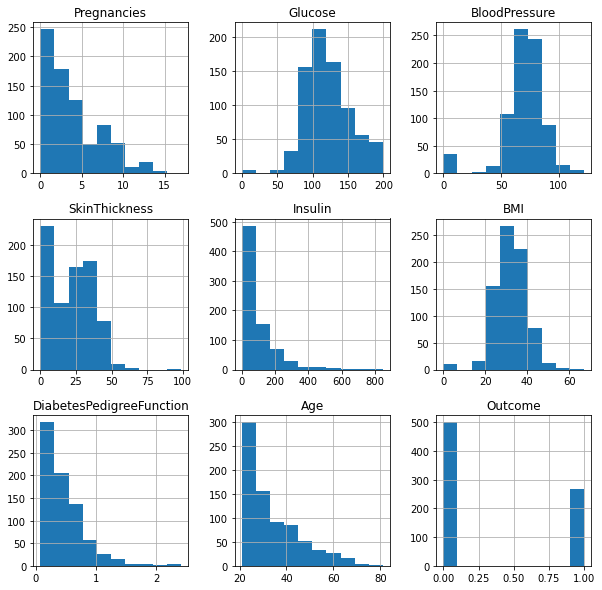

In [34]:
# Create the histogram of all the variables. Set Figure size 10 by 10 inches

%matplotlib inline
DiabetData.hist(figsize = (10,10))
plt.show()

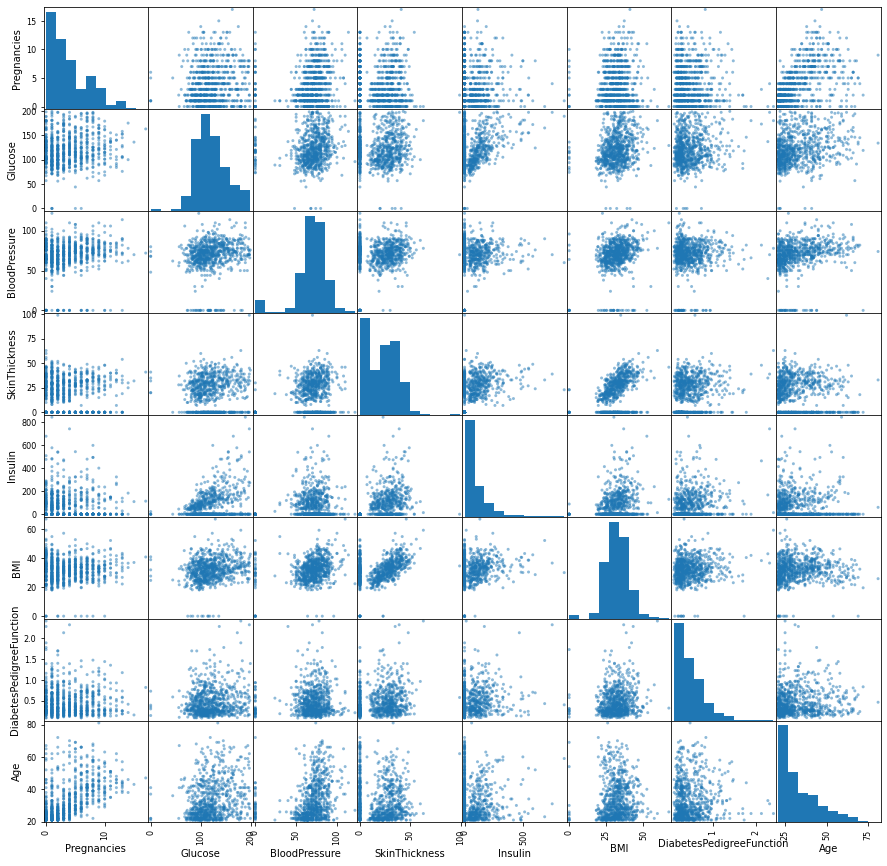

In [35]:
# create a grid of scatterplot and histogram

%matplotlib inline
X = DiabetData[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
from pandas.plotting import scatter_matrix
scatter_matrix(X,figsize=(15,15))
plt.show() 

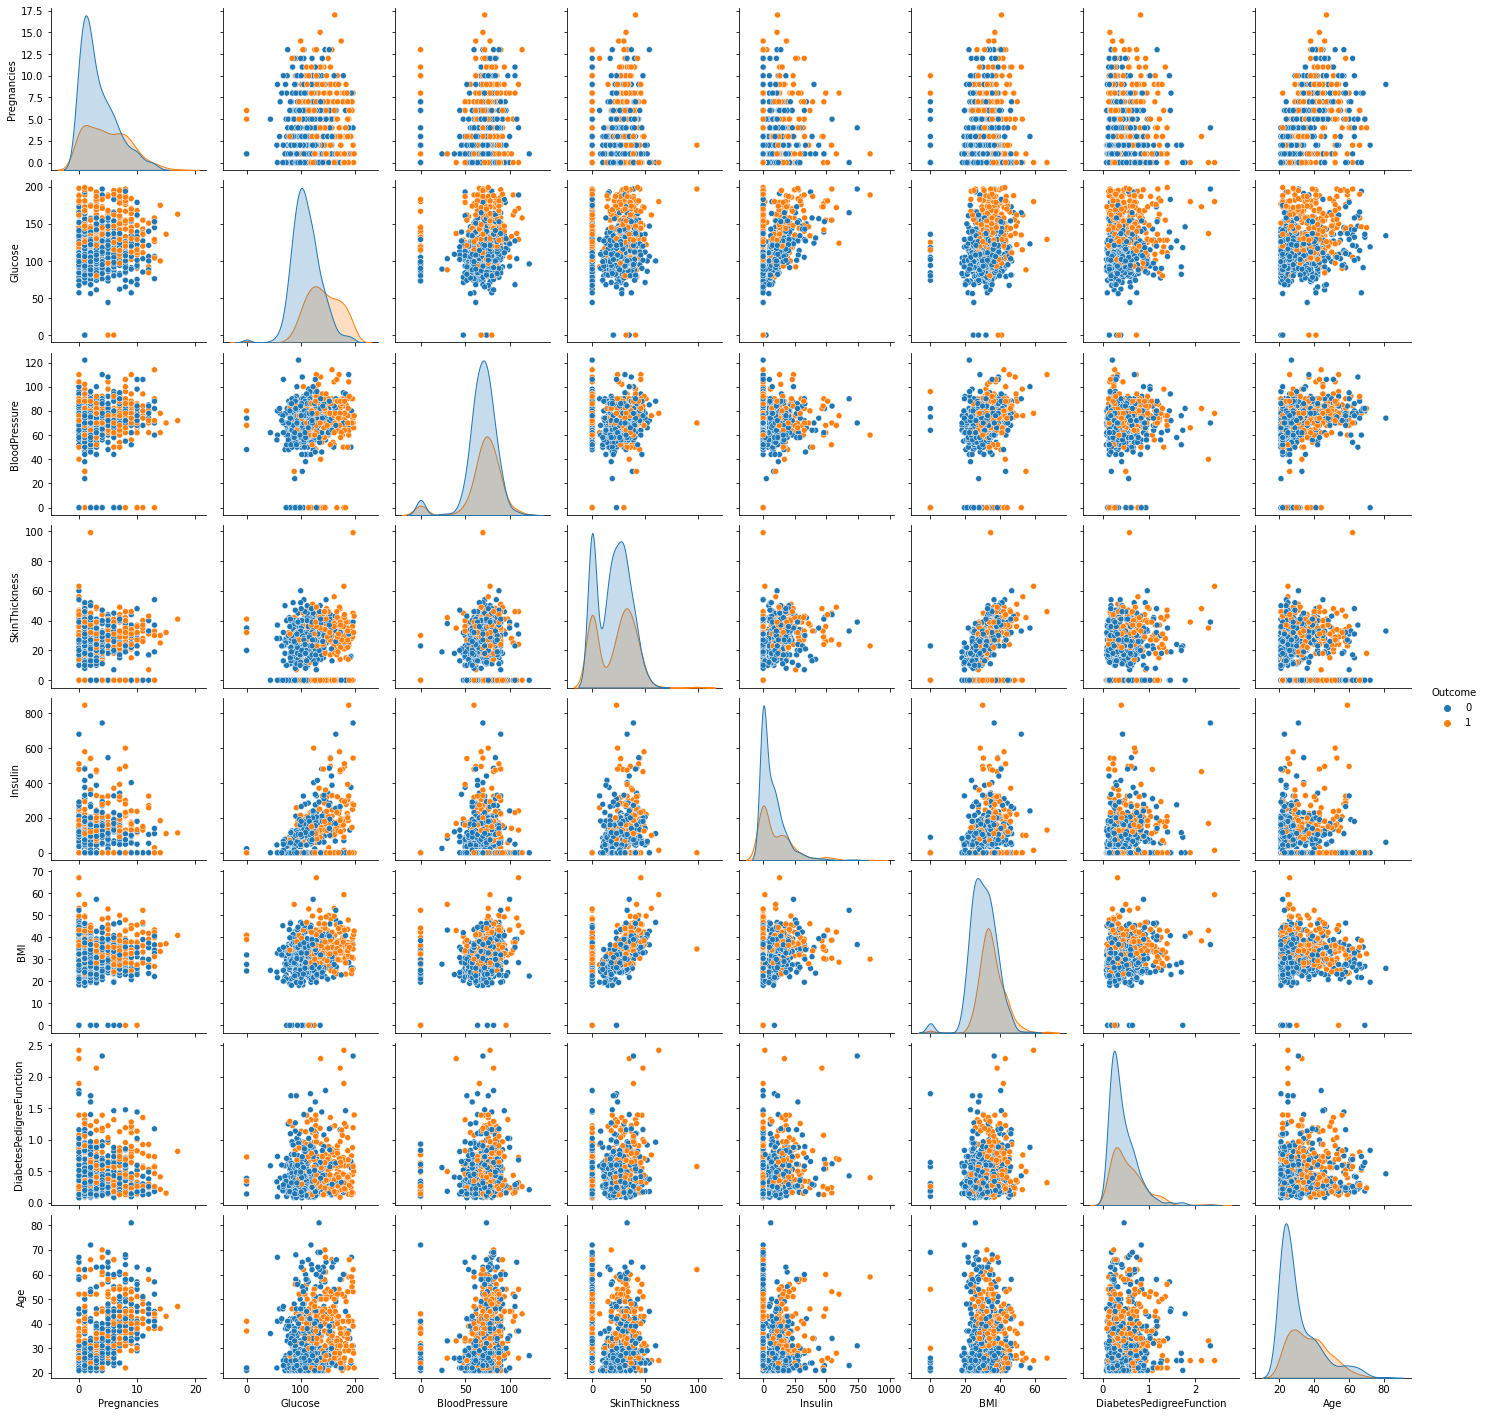

In [36]:
# Creating a pairplot differentiatied by Outcome

%matplotlib inline
X = DiabetData[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']] 
from pandas.plotting import scatter_matrix
sns.pairplot(X, hue = 'Outcome')
plt.show() 

# Algorithm Implementation 

## Prepare data by using relevant preprocessing transformations, data standardization,deaing with null. Divide data into test and training set.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Divide data into predictor features vector and the label of the target variable 'Outcome'

X = DiabetData[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] 
y = DiabetData[['Outcome']]

# Check if null values in the columns
X.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [38]:
# Divide data into predictor features vector and the label of the target variable 'Outcome'

X = DiabetData[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] 
y = DiabetData[['Outcome']]

#print(X)
#print(y)

# Dividing data into two subsets :train and test set.Training set trains the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Data normalization  

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



## Fit the train data. Predict the test data.

In [39]:
# Initiating the scikit learn instance and fit is used to train the model.The predict() function 
# implements prediction.It takes test data as an argument and returns predicted labels.

# Importing the MLPClassifier class from the sklearn.neural_network library.Creating three layers of 5 nodes each.
# Number of iterations ie 1000 represents the number of epochs ie one feed foward and one backpropogation. 
# This represents one cycle.


from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(5, 5, 5), max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())
y_pred = mlp.predict(X_test)

 ##  Evaluate the first algorithm and its model performance.

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
accuracy =  accuracy_score(y_test,y_pred)*100
print(accuracy)


[[93 13]
 [20 28]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       106
           1       0.68      0.58      0.63        48

    accuracy                           0.79       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154

78.57142857142857


In [41]:
# Initiating the scikit learn instance and fit is used to train the model.The predict() function 
# implements prediction.It takes test data as an argument and returns predicted labels.

# Importing the MLPClassifier class from the sklearn.neural_network library.Creating three layers of 10 nodes each.
# Number of iterations ie 1000 represents the number of epochs ie one feed foward and one backpropogation. 
# This represents one cycle.


from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10000)
mlp.fit(X_train, y_train.values.ravel())
y_pred = mlp.predict(X_test)
print(classification_report(y_test,y_pred))
accuracy =  accuracy_score(y_test,y_pred)*100
print(accuracy)


              precision    recall  f1-score   support

           0       0.84      0.85      0.85       106
           1       0.66      0.65      0.65        48

    accuracy                           0.79       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.78      0.79      0.79       154

78.57142857142857


## 6. Evaluate the current algorithm and variety of algorithms by creating test harness for diversealgorithms in conjunction with resampling techniques like cross validation, variable importance.bootstrapping.Improve Result by playing with hyperparameters and innovative methods like ensembles.

In [42]:
# lbfgs : Limited memory Broyden Fletcher Goldfarb Shanno algorithm. 
# This algorithm uses second order derivate to guide optimization which make convergence faster
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
# alpha: L2 penalty (regularization term that smoothens) parameter.

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(4, 5), max_iter=1000, random_state=1)

clf.fit(X_train,y_train.values.ravel())

y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)
print('Diabet Data Set:\n')
print("Training accuracy for the MLP: {:.2f} %".format(accuracy_score(y_train,np.ravel(y_pred_train))*100))
print("Confusion Matrix:\n",confusion_matrix(y_test,np.ravel(y_pred)))


print(classification_report(y_test,np.ravel(y_pred)))


clf_accuracy = accuracy_score(y_test,np.ravel(y_pred))*100
print("Testing accuracy for the MLP: {:.2f} %".format(clf_accuracy))

Diabet Data Set:

Training accuracy for the MLP: 81.92 %
Confusion Matrix:
 [[90 16]
 [18 30]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       106
           1       0.65      0.62      0.64        48

    accuracy                           0.78       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.78      0.78      0.78       154

Testing accuracy for the MLP: 77.92 %


In [43]:
from sklearn.model_selection import KFold, cross_val_score

# k fold Crossvalidation used to avoid overfitting the data.
clf_kfold1 = KFold(n_splits=10, random_state=7, shuffle=True)
mlp_training_score1 = cross_val_score(clf, X_train,np.ravel(y_train), cv=clf_kfold1)
print('Diabet dataset:\n')
print("Training score for the Neural Network after applying the crossvalidation: {:.2f} %".format(mlp_training_score1.mean()*100))
print("Confusion Matrix:\n",confusion_matrix(y_test,(np.ravel(y_pred))))


print(classification_report(y_test,np.ravel(y_pred)))
mlp_testing_score1 = cross_val_score(clf, X_test, np.ravel(y_test), cv=clf_kfold1)
print("Testing score for the Neural Network after applying the crossvalidation: {:.2f} %".format(mlp_testing_score1.mean()*100))

Diabet dataset:

Training score for the Neural Network after applying the crossvalidation: 72.30 %
Confusion Matrix:
 [[90 16]
 [18 30]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       106
           1       0.65      0.62      0.64        48

    accuracy                           0.78       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.78      0.78      0.78       154

Testing score for the Neural Network after applying the crossvalidation: 70.00 %


##  Improve Result by playing with hyperparameters and innovative methods like ensembles.
## Choose the best model and present the results. 

In [58]:
# Selecting 'relu' as the solver for weight optimization.
 # Adam optimization algorithm is an extension to stochastic gradient descent that has recently been used 
# for deep learning applications in computer vision and natural language processing.

# https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', max_iter=10000)
X = DiabetData[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] 
y = DiabetData[['Outcome']]

#print(X)
#print(y)

# Dividing data into two subsets :train and test set.Training set trains the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Data normalization  

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
mlp.fit(X_train,y_train.values.ravel())

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

y_pred = mlp.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
accuracy =  accuracy_score(y_test,y_pred)*100
print(accuracy)

[[338  56]
 [ 69 151]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       394
           1       0.73      0.69      0.71       220

    accuracy                           0.80       614
   macro avg       0.78      0.77      0.78       614
weighted avg       0.79      0.80      0.79       614

[[87 19]
 [15 33]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       106
           1       0.63      0.69      0.66        48

    accuracy                           0.78       154
   macro avg       0.74      0.75      0.75       154
weighted avg       0.78      0.78      0.78       154

77.92207792207793


In [61]:
# Choosing tanh as the activation function

from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(hidden_layer_sizes=(8,8,8),activation ='tanh', max_iter=10000)
X = DiabetData[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] 
y = DiabetData[['Outcome']]

#print(X)
#print(y)

# Dividing data into two subsets :train and test set.Training set trains the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Data normalization  

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
mlp.fit(X_train,y_train.values.ravel())

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

y_pred = mlp.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
accuracy =  accuracy_score(y_test,y_pred)*100
print(accuracy)

[[335  63]
 [ 77 139]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       398
           1       0.69      0.64      0.67       216

    accuracy                           0.77       614
   macro avg       0.75      0.74      0.75       614
weighted avg       0.77      0.77      0.77       614

[[91 11]
 [16 36]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       102
           1       0.77      0.69      0.73        52

    accuracy                           0.82       154
   macro avg       0.81      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154

82.46753246753246


# Conclusion

In this project we have explored diabetes outcome (0 means no diabetes, 1 means yes diabetes) with some factors :number of Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, FDiabetesPedigreeFunction, Age. The research used Neural Network algorithm model on dataset, to identify what outcome was predicted (0 means no diabetes, 1 means yes diabetes). We were investigated effect of some parameters (same as activation, solver) too. Also, we investigate cross validation effect.

In this search, By MLPCalssifier implementation, I found accuracy 78% for test data. I used 3 hidden layers with 5 nodes on each and number of max_iter is equal to 1000. I played with numbers of hidden layers, number of nodes and number of epochs. I also used cross validation. None of them improved the accuracy. I also played with alpha and solver parameters, but it didn’t change.  But when I changed activation function from Relu to tanh , the accuracy was improved and increased to 82%.
Finally, I could find the accuracy of 82% with this model in this parameters: 3 hidden layers with 8 nodes on each and max_iter=10000 with tanh activation function.

Now with this model, we can predict with 82% accuracy whether a patient with certain data we have has diabetes or not. 


# Refrences

 1.https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
 
2. https://www.kaggle.com/datasets/jillanisofttech/diabetes-disease-updated-dataset. 